In [760]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [761]:
data_file = "conso.txt"

In [762]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [763]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [764]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


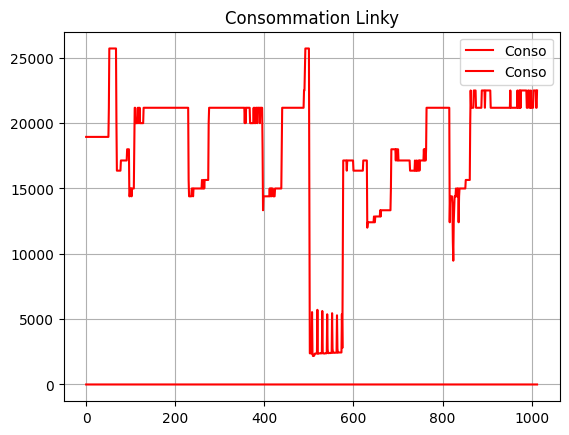

In [765]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [766]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [767]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  69960 non-null  int64  
 1   kWh       69960 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


In [768]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
69955,16786,0.21
69956,17056,0.21
69957,17179,0.21
69958,16802,0.21


In [769]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
69955,16786,0.21,16.786,214.464435,1678588794
69956,17056,0.21,17.056,211.069418,1678605850
69957,17179,0.21,17.179,209.558182,1678623029
69958,16802,0.21,16.802,214.260207,1678639831


In [770]:
# index dernier echantillon
l=len(conso_data)-1
l

69959

In [771]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1678656396000

In [772]:
old

False

In [773]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 27, 53, 39593)

In [774]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   69960 non-null  int64         
 1   kWh        69960 non-null  float64       
 2   sec        69960 non-null  float64       
 3   Wh         69960 non-null  float64       
 4   cumul(ms)  69960 non-null  int64         
 5   dates      69960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.2 MB


In [775]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:28:19.328593,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:28:45.571593,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:29:11.456593,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:29:37.210593,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:30:02.984593,07/03/2024
...,...,...,...,...,...,...,...
69955,16786,0.21,16.786,214.464435,1678588794,2024-03-26 10:44:21.833593,26/03/2024
69956,17056,0.21,17.056,211.069418,1678605850,2024-03-26 10:44:38.889593,26/03/2024
69957,17179,0.21,17.179,209.558182,1678623029,2024-03-26 10:44:56.068593,26/03/2024
69958,16802,0.21,16.802,214.260207,1678639831,2024-03-26 10:45:12.870593,26/03/2024


In [776]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:28:19.328593   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh   cumul(ms)  \
 69959     16565  0.22  16.565  217.325687  1678656396   
 
                            dates        days  
 69959 2024-03-26 10:45:29.435593  26/03/2024  )

In [777]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'26/03/2024'

In [778]:
month, year

(3, 2024)

In [779]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour



In [780]:
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:prefd='0'
    else:prefd=''
    if month<10:prefm='0'
    else:prefm=''
    day = f'{prefd}{d}/{prefm}{month}/{year}'
    conso_graph.append((day,conso_by_day(day)))
    #print(day,conso_by_day(day))
conso_df = pd.DataFrame(conso_graph, columns=('day','conso'))
conso_df.set_index('day',inplace=True)
conso_df

,conso
day,
07/03/2024,3.331
08/03/2024,3.762
09/03/2024,3.059
10/03/2024,3.569
11/03/2024,4.527
12/03/2024,3.550
13/03/2024,3.508
14/03/2024,3.703
15/03/2024,3.545


In [781]:

mean = conso_df['conso'].mean()
mean

3.4979999999999998

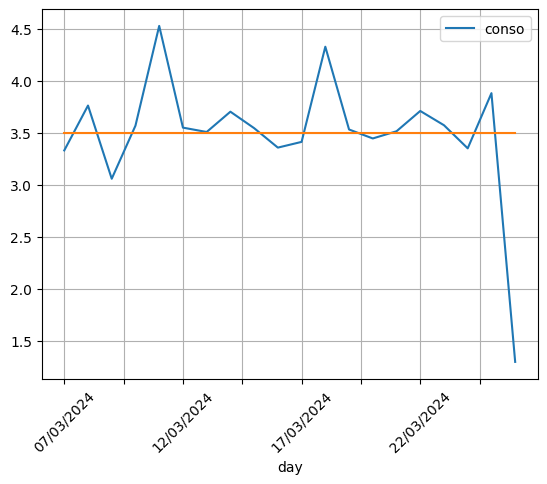

In [782]:
conso_df.plot()
plt.plot()
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [783]:
#manuel
#day = '19/03/2024'


In [784]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

1300

In [785]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_11664\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:12,16814,0.21,16.814,214.107292,1639938990,2024-03-26 00:00:12.029593,26/03/2024
0:0:28,16438,0.22,16.438,219.004745,1639955428,2024-03-26 00:00:28.467593,26/03/2024
0:0:45,17105,0.21,17.105,210.464776,1639972533,2024-03-26 00:00:45.572593,26/03/2024
0:1:2,17197,0.21,17.197,209.338838,1639989730,2024-03-26 00:01:02.769593,26/03/2024
0:1:20,17313,0.21,17.313,207.936233,1640007043,2024-03-26 00:01:20.082593,26/03/2024
...,...,...,...,...,...,...,...
10:44:21,16786,0.21,16.786,214.464435,1678588794,2024-03-26 10:44:21.833593,26/03/2024
10:44:38,17056,0.21,17.056,211.069418,1678605850,2024-03-26 10:44:38.889593,26/03/2024
10:44:56,17179,0.21,17.179,209.558182,1678623029,2024-03-26 10:44:56.068593,26/03/2024


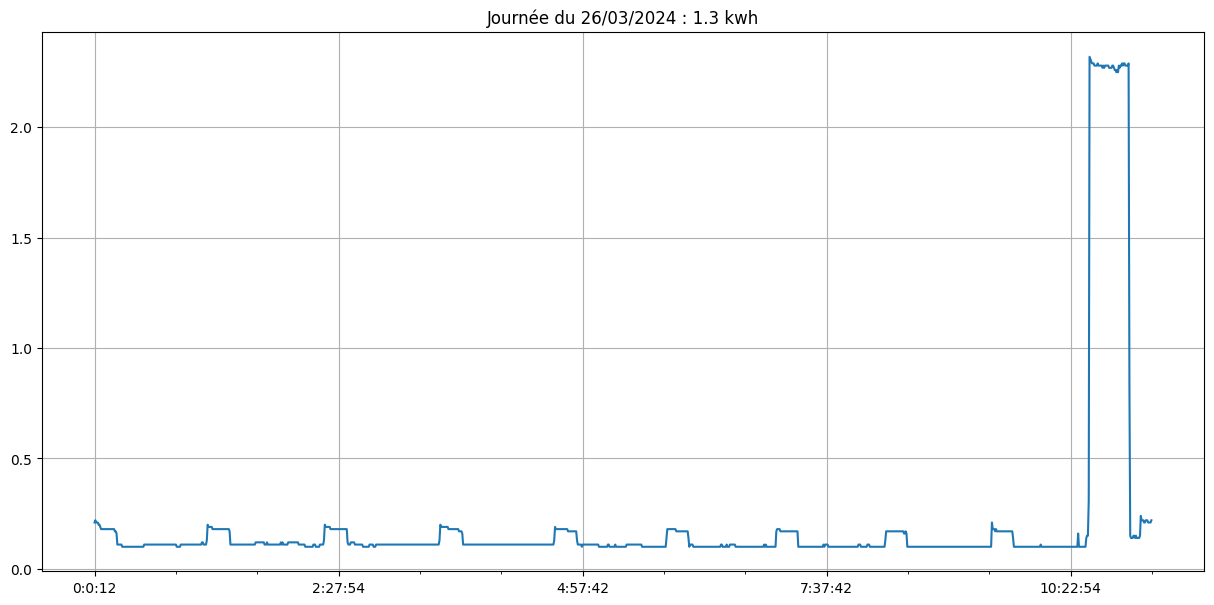

In [786]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

50

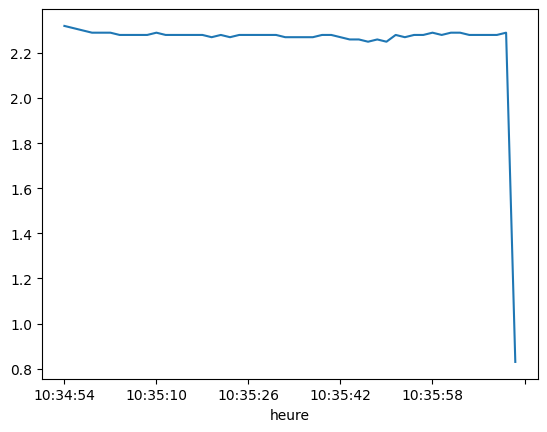

In [787]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

752

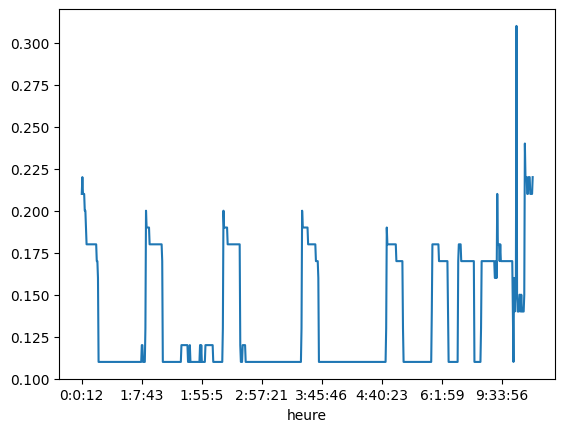

In [788]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

1250

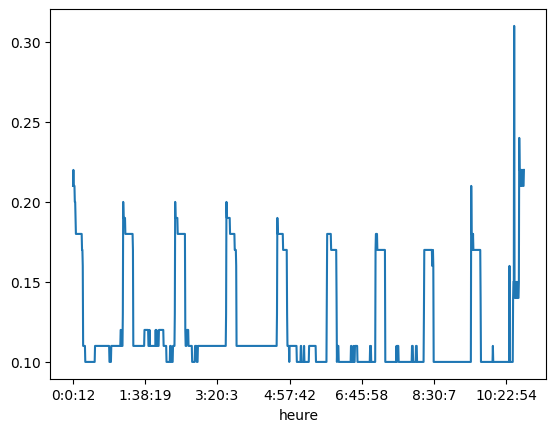

In [789]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [790]:
time = conso_data['dates']
time


0       2024-03-07 00:28:19.328593
1       2024-03-07 00:28:45.571593
2       2024-03-07 00:29:11.456593
3       2024-03-07 00:29:37.210593
4       2024-03-07 00:30:02.984593
                   ...            
69955   2024-03-26 10:44:21.833593
69956   2024-03-26 10:44:38.889593
69957   2024-03-26 10:44:56.068593
69958   2024-03-26 10:45:12.870593
69959   2024-03-26 10:45:29.435593
Name: dates, Length: 69960, dtype: datetime64[ns]

In [791]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [792]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [793]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

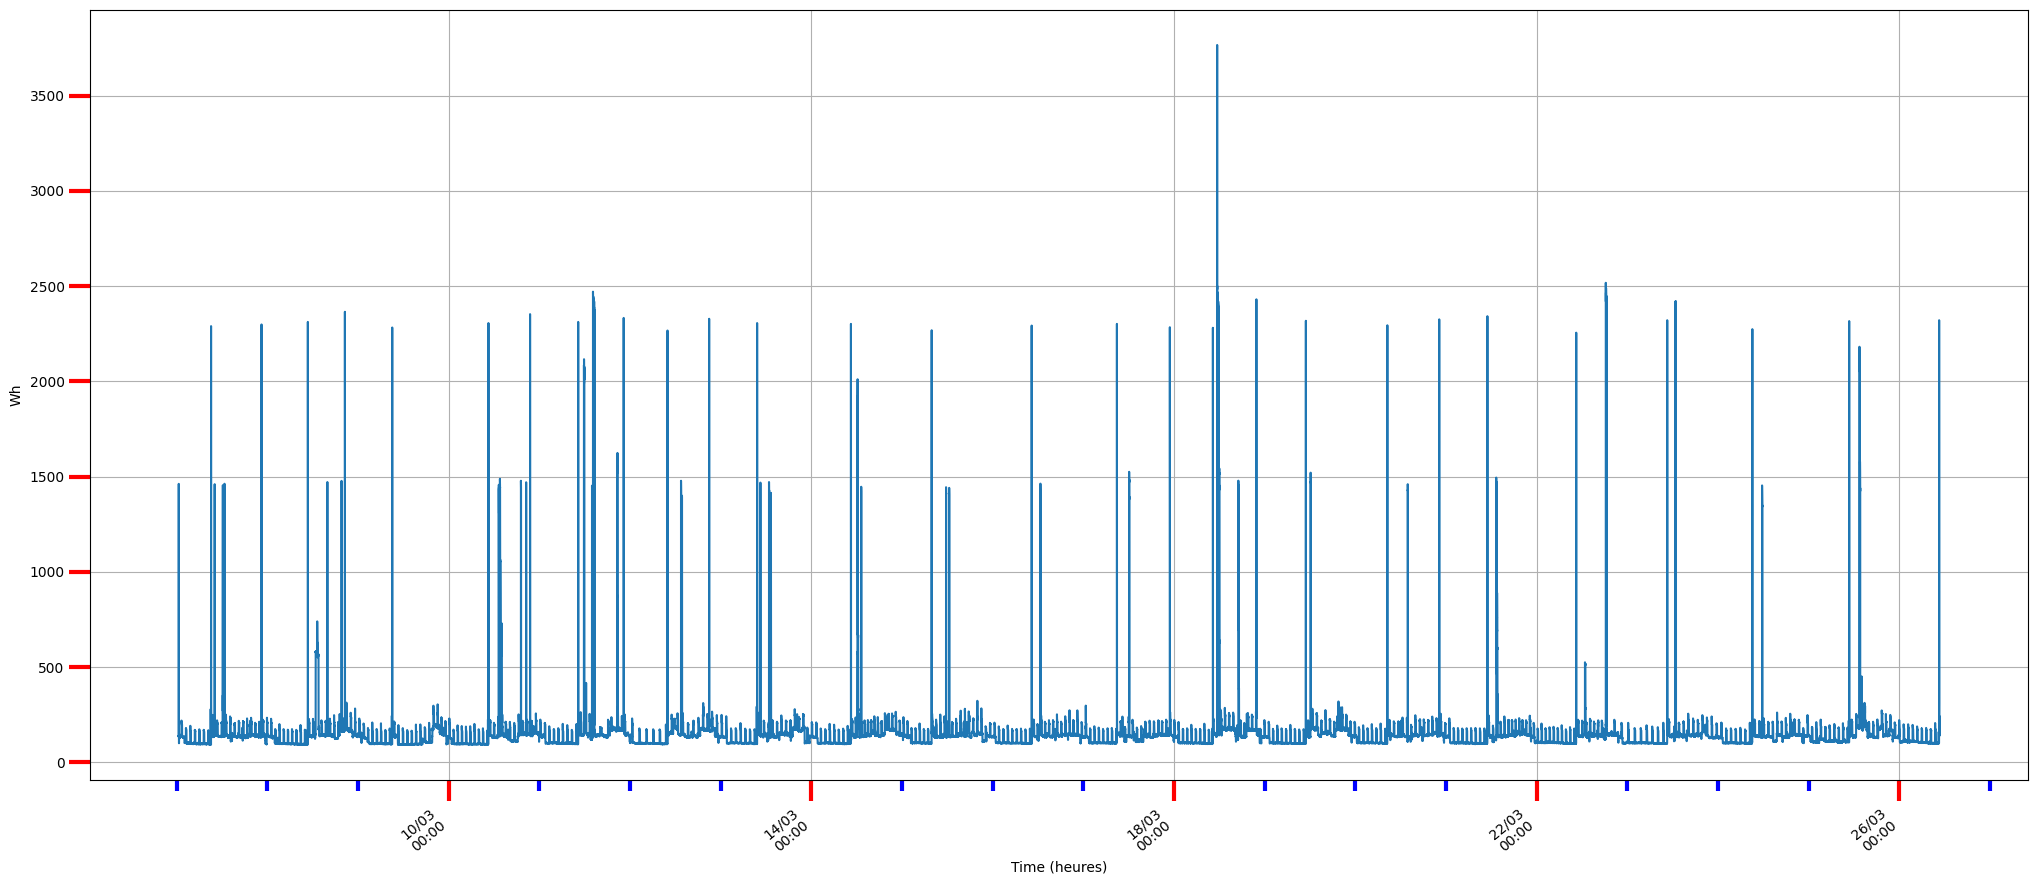

In [794]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [795]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
69959,16565,0.22,16.565,217.325687,1678656396,2024-03-26 10:45:29.435593,26/03/2024


In [796]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1678656396000

# Slice of last 1 kWh

In [797]:
l = len(conso_data)  # total watt consommés
l

69960

In [798]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(69960, 1000)

In [799]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [800]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 68960     19980  0.18  19.980  180.180180  1648801720   
 68961     19594  0.18  19.594  183.729713  1648821314   
 68962     19661  0.18  19.661  183.103606  1648840975   
 68963     19771  0.18  19.771  182.084872  1648860746   
 68964     19729  0.18  19.729  182.472502  1648880475   
 ...         ...   ...     ...         ...         ...   
 69955     16786  0.21  16.786  214.464435  1678588794   
 69956     17056  0.21  17.056  211.069418  1678605850   
 69957     17179  0.21  17.179  209.558182  1678623029   
 69958     16802  0.21  16.802  214.260207  1678639831   
 69959     16565  0.22  16.565  217.325687  1678656396   
 
                            dates        days  
 68960 2024-03-26 02:27:54.759593  26/03/2024  
 68961 2024-03-26 02:28:14.353593  26/03/2024  
 68962 2024-03-26 02:28:34.014593  26/03/2024  
 68963 2024-03-26 02:28:53.785593  26/03/2024  
 68964 2024-03-26 02:29:13.514593  26/03/2024  
 ...   

In [801]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [802]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [803]:
cumtime_end,cumtime_start

(1678656396000, 1648821314000)

In [804]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

29835082000

In [805]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 26, 10, 45, 35, 521108),
 datetime.datetime(2024, 3, 26, 2, 28, 20, 439108),
 '26/03/2024 10:45:29')

In [806]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:28:19.328593,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:28:45.571593,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:29:11.456593,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:29:37.210593,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:30:02.984593,07/03/2024
...,...,...,...,...,...,...,...
69955,16786,0.21,16.786,214.464435,1678588794,2024-03-26 10:44:21.833593,26/03/2024
69956,17056,0.21,17.056,211.069418,1678605850,2024-03-26 10:44:38.889593,26/03/2024
69957,17179,0.21,17.179,209.558182,1678623029,2024-03-26 10:44:56.068593,26/03/2024
69958,16802,0.21,16.802,214.260207,1678639831,2024-03-26 10:45:12.870593,26/03/2024


In [807]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('26/03/2024 02:28:14', '26/03/2024 10:45:29')

In [808]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-26 02:27:54.759593', '2024-03-26 10:45:29.435593')

In [809]:
k

1

In [810]:
data.Interval.tail(1000)

68960    19980
68961    19594
68962    19661
68963    19771
68964    19729
         ...  
69955    16786
69956    17056
69957    17179
69958    16802
69959    16565
Name: Interval, Length: 1000, dtype: int64

In [811]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.298515555555557, 2.892083510518079, 8, 17, 54)

In [812]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_11664\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [813]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
68960,19980,0.18,19.980,180.180180,1648801720,2024-03-26 02:27:54.759593,26/03/2024,2024-03-26 02:27:54.759593
68961,19594,0.18,19.594,183.729713,1648821314,2024-03-26 02:28:14.353593,26/03/2024,2024-03-26 02:28:14.353593
68962,19661,0.18,19.661,183.103606,1648840975,2024-03-26 02:28:34.014593,26/03/2024,2024-03-26 02:28:34.014593
68963,19771,0.18,19.771,182.084872,1648860746,2024-03-26 02:28:53.785593,26/03/2024,2024-03-26 02:28:53.785593
68964,19729,0.18,19.729,182.472502,1648880475,2024-03-26 02:29:13.514593,26/03/2024,2024-03-26 02:29:13.514593
...,...,...,...,...,...,...,...,...
69955,16786,0.21,16.786,214.464435,1678588794,2024-03-26 10:44:21.833593,26/03/2024,2024-03-26 10:44:21.833593
69956,17056,0.21,17.056,211.069418,1678605850,2024-03-26 10:44:38.889593,26/03/2024,2024-03-26 10:44:38.889593
69957,17179,0.21,17.179,209.558182,1678623029,2024-03-26 10:44:56.068593,26/03/2024,2024-03-26 10:44:56.068593
69958,16802,0.21,16.802,214.260207,1678639831,2024-03-26 10:45:12.870593,26/03/2024,2024-03-26 10:45:12.870593


<Axes: >

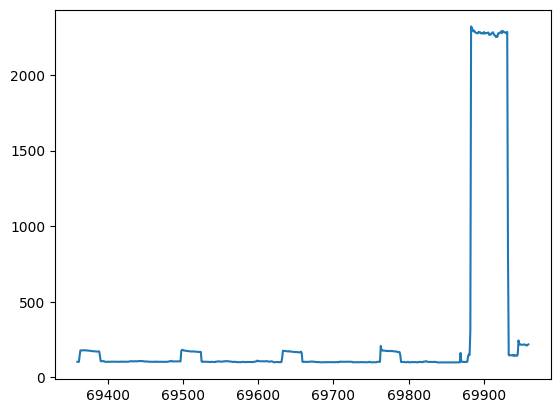

In [814]:
data.tail(600)['Wh'].plot()

In [815]:
data['Wh']

68960    180.180180
68961    183.729713
68962    183.103606
68963    182.084872
68964    182.472502
            ...    
69955    214.464435
69956    211.069418
69957    209.558182
69958    214.260207
69959    217.325687
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

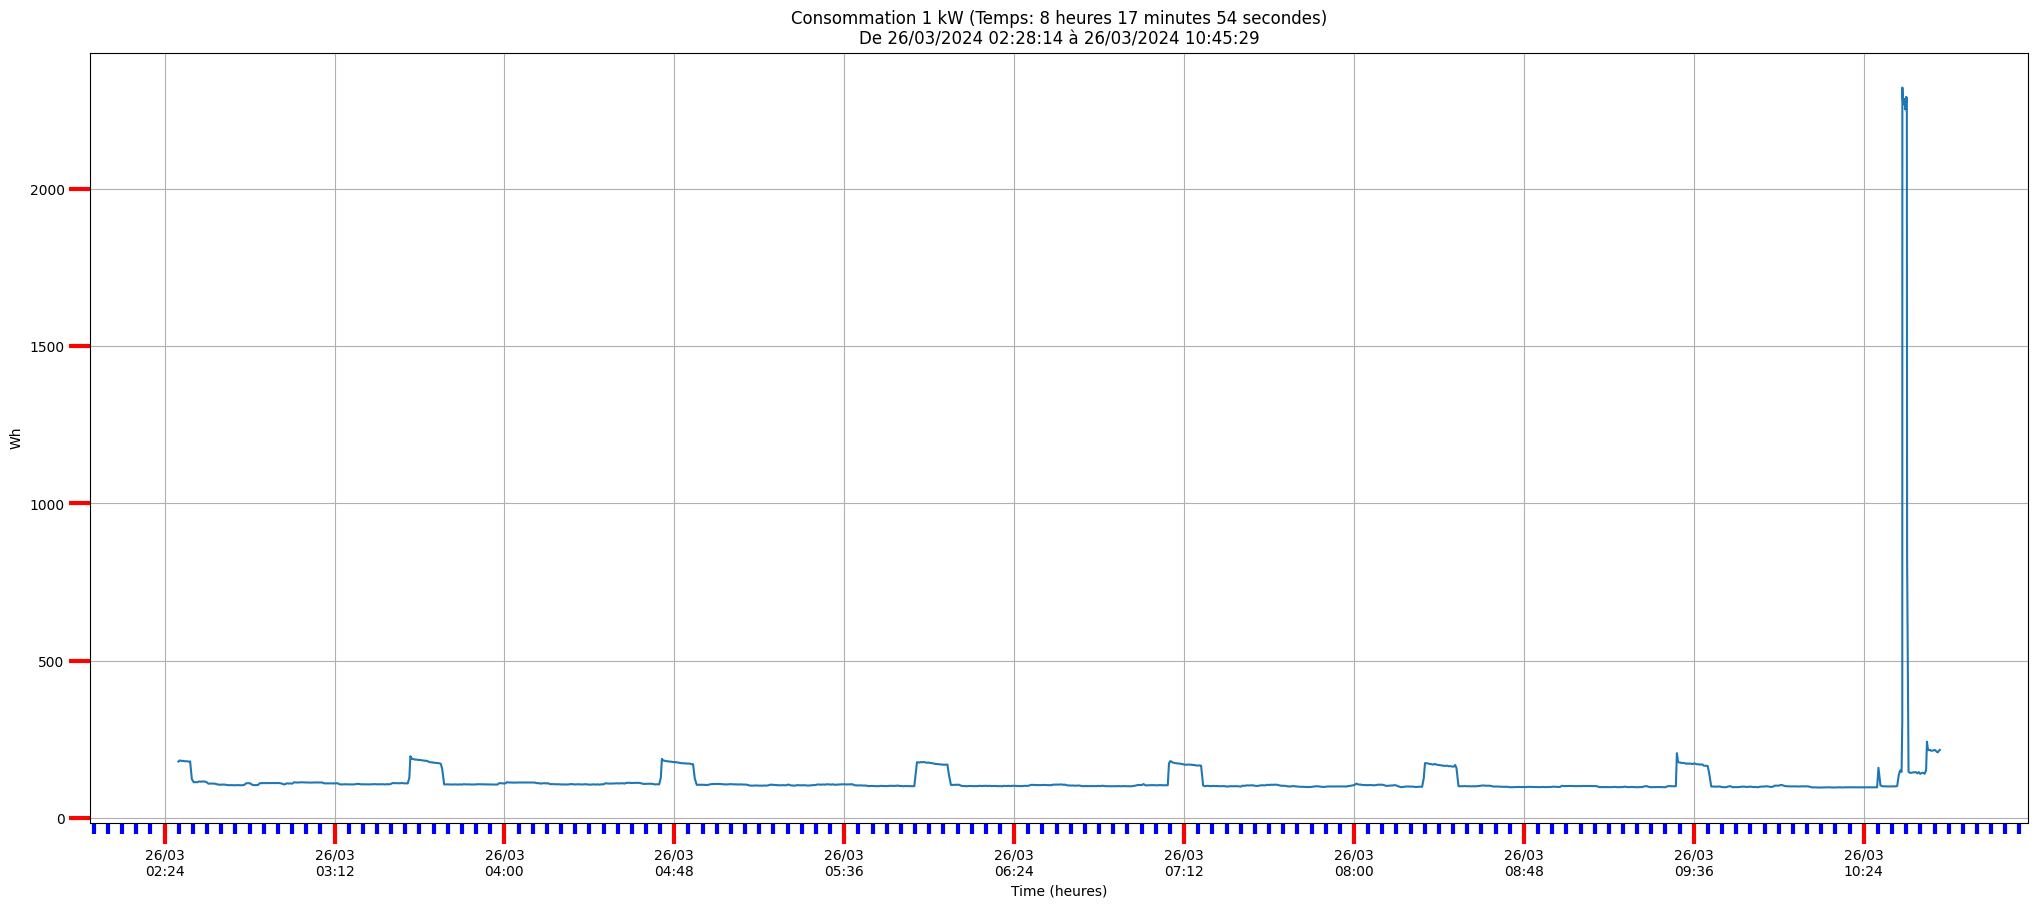

In [816]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

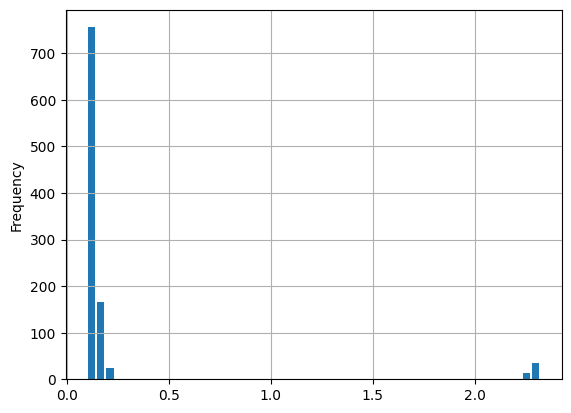

In [817]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [818]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
69955,16786,0.21,16.786,214.464435,1678588794,2024-03-26 10:44:21.833593,26/03/2024
69956,17056,0.21,17.056,211.069418,1678605850,2024-03-26 10:44:38.889593,26/03/2024
69957,17179,0.21,17.179,209.558182,1678623029,2024-03-26 10:44:56.068593,26/03/2024
69958,16802,0.21,16.802,214.260207,1678639831,2024-03-26 10:45:12.870593,26/03/2024
69959,16565,0.22,16.565,217.325687,1678656396,2024-03-26 10:45:29.435593,26/03/2024


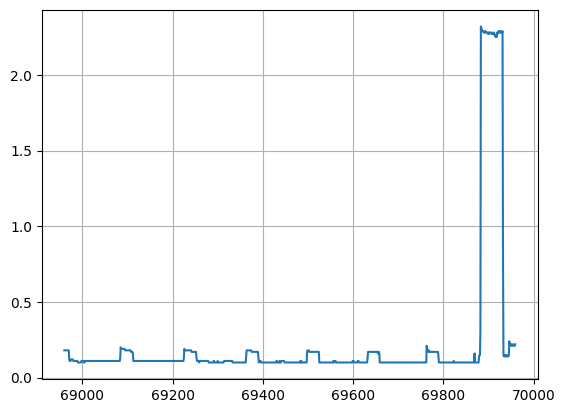

In [819]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [820]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1678656396000.0, 27977.6066)

In [821]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 26, 10, 45, 39, 592337),
 datetime.datetime(2024, 3, 7, 0, 28, 3, 196337))

In [822]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(69960, 1678657, 466.2936111111111)

In [823]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [824]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [825]:
732/12 # 60 jours

61.0

In [826]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

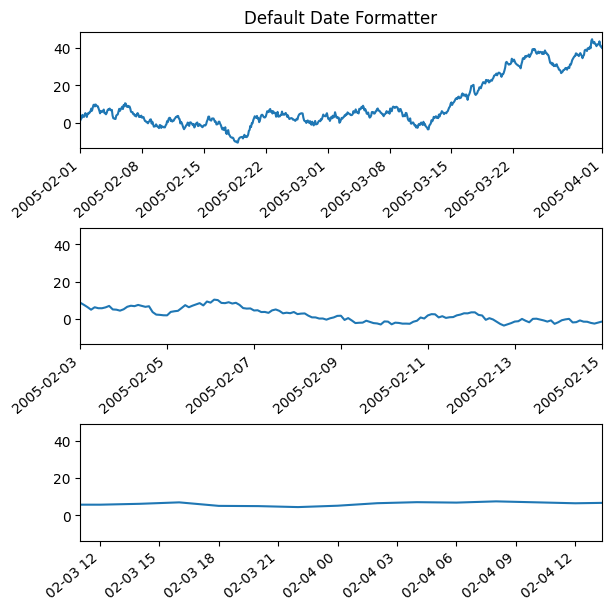

In [827]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [828]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)